# Module 3 Assignment - Cleaning “Messy” Data

#### Group Member: Jinming Chen, Shichao Zhou, Maojudan Nihemaiti

# Introduction
The wine dataset contains 16 attributes that are related to the chemical composition. 
The following work will be investigated and cleaned the dataset for further analysis.


The following are our analysis steps:


- Import the data set and introduce the data dictionary.
- Apply exploratory data analysis (EDA) to detect missing and invalid values and create plots.
- Use two ways to analyze missing data.
- Handle invalid data.
- Use box cox to transform data distributions.
- Re-run the EDA to ensure the data is well prepared for subsequent modeling.

Before doing the EDA, let's import the original data set into the pandas data frame first.

# Data dictionary

+ INDEX: Unique ID
- Target:Response Variable (indicates # of cases of wine sold)
- AcidIndex:Measures total acidity of wine via a weighted average
- Alcohol:Alcohol Content
- Chlorides:Chloride content of the wine
- CitricAcid:Citric Acid content of the wine
- Density:Density of the wine
- FixedAcidity:FixedAcidity of the wine
- FreeSulfurDioxide:Sulfur Dioxide content of the wine
- LabelAppeal:Subjective marketing score that indicates the appeal of 
the design of the label on the bottle
- ResidualSugar:Residual sugar content of the wine
- Stars:Wine rating as determined by experts (4 = excellent; 1 = 
Poor
- Sulphates:Sulfate content of the wine
- TotalSulfurDioxide:Total sulfur dioxide content of the wine
- VolatileAcidlity:Volatile acid content of the wine
- pH:pH of the wine

The dataset contains 16 columns. The number of columns showing the chemical properties of the wine is 12. "LabelAppeal" and "Star" show that the subjective marketing responses towards wine.

+ Categorical variables:Target,AcidIndex,LabelAppeal and Stars
+ Numerical varibables:AcidIndex,Alcohol,Chlorides,CitricAcid,Density,FixedAcidity,FreeSulfurDioxide,
  ResidualSugar,Sulphates,TotalSulfurDioxide,VolatileAcidlity,pH.


In [1]:
# Load all the libraries that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Start by reading a set of sample data from github. This data set contains information related to automobile.
df = pd.read_csv("https://raw.githubusercontent.com/JinmingChen12/DATA_SCIENCE/main/M3_Data.csv")


df.head()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


The above dataframe shows that the unnamed column and the index of the first column are meaningless to further create predictive models, just like unique Id. So we drop the columns.

In [3]:
# Drop column Unnamed
data= df.drop(columns=['Unnamed: 0','INDEX'])
data.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


# Exploratory Data Analysis (EDA)

In this part, we will find and analyze the missing and invalid values and make histograms and other graphs to determine further how to fix the data to improve its usability.

In [4]:
# Pre-review the dataframe
# We have 12795 observations and 15 columns
data.shape

(12795, 15)

In [5]:
# Check the statistical information for the dataset
data.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


+ The "pH" has invalid data. Typically, the pH level of wine ranges from 3 to 4. From the statistical information above, we can see that in this set of ph data, the maximum value is 6.13, and the minimum value is 0.48, which does not meet the standard red wine pH value range. In the following data cleaning step, we will delete invalid data. (https://www.winemag.com/2019/06/19/what-is-acidity-in-wine/)
+ The "TotalSulfurDioxide" has invalid data. TTB regulations say any wine with a level greater than ten mg/l must say "contains sulfites" on the label. The maximum level allowed is 350 mg/l. From the statistical information above, we can see that in this set of TotalSulfurDioxide data, the maximum value is 1057 mg/l, which does not meet the standard wine's SulfurDioxide value range. In the following data cleaning step, we will delete invalid data. (http://www.piwine.com/media/home-wine-making-basics/using_sulfur_dioxide.pdf)
+ Except "LabelAppeal" has negative values, the other variables have "0" or positive data. We do not need to remove the negative values of "LabelAppeal" because it represents subjective marketing scores, not relevant to wine quality. The value of "-2" means the worst, and "2" means the best.
+ "FixedAcidity","VolatileAcidity","CitricAcid","ResidualSugar","Chlorides","FreeSulfurDioxide","TotalSulfurDioxide","Sulphates" and "Alcohol" variables have "0" as minimum values. We regard these "0" values as missing values(NaN) because the following two reasons: 1: Prevent the number of observations from being greatly reduced due to the deletion of too many "0" values. 2: The values of chemical properties of wine successfully sold cannot be zero.

In [6]:
# Regard these "0" values as missing values(NaN)
data['FixedAcidity'].replace(0,np.nan,inplace = True)
data['VolatileAcidity'].replace(0,np.nan,inplace = True)
data['CitricAcid'].replace(0,np.nan,inplace = True)
data['ResidualSugar'].replace(0,np.nan,inplace = True)
data['Chlorides'].replace(0,np.nan,inplace = True)
data['FreeSulfurDioxide'].replace(0,np.nan,inplace = True)
data['TotalSulfurDioxide'].replace(0,np.nan,inplace = True)
data['Sulphates'].replace(0,np.nan,inplace = True)
data['Alcohol'].replace(0,np.nan,inplace = True)



In [7]:
# Description of dataset
data.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12756.000000,12777.000000,12680.000000,12173.000000,12152.000000,12137.000000,12106.000000,12795.000000,12400.000000,11563.000000,12140.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,8.087904,0.641989,0.692539,23.379327,0.222650,106.775727,204.437263,0.994203,3.207628,0.848279,10.525511,-0.009066,7.772724,2.041755
std,1.926368,4.983786,0.555484,0.605196,24.946418,0.234292,108.103932,163.090000,0.026538,0.679687,0.655193,3.626938,0.891089,1.323926,0.902540
min,0.000000,0.100000,0.005000,0.010000,0.100000,0.001000,1.000000,1.000000,0.888090,0.480000,0.010000,0.100000,-2.000000,4.000000,1.000000
25%,2.000000,5.600000,0.250000,0.290000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,7.000000,0.410000,0.440000,12.900000,0.099000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.900000,0.910000,0.980000,38.700000,0.368000,172.000000,262.750000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [8]:
# Check the missing value for each column
data.isnull().sum().sort_values(ascending=False)/(len(data))*100

STARS                 26.252442
Sulphates              9.628761
TotalSulfurDioxide     5.384916
FreeSulfurDioxide      5.142634
Alcohol                5.119187
Chlorides              5.025401
ResidualSugar          4.861274
pH                     3.087143
CitricAcid             0.898789
FixedAcidity           0.304807
VolatileAcidity        0.140680
AcidIndex              0.000000
LabelAppeal            0.000000
Density                0.000000
TARGET                 0.000000
dtype: float64

+ ResidualSugar, Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,pH,Sulphates,Alcohol have missing values.
+ The "Stars" (categorical data) column has the highest missing values with about 26%, whereas pH has 
  only 3% missing values.

In [9]:
# Pre-review the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET              12795 non-null  int64  
 1   FixedAcidity        12756 non-null  float64
 2   VolatileAcidity     12777 non-null  float64
 3   CitricAcid          12680 non-null  float64
 4   ResidualSugar       12173 non-null  float64
 5   Chlorides           12152 non-null  float64
 6   FreeSulfurDioxide   12137 non-null  float64
 7   TotalSulfurDioxide  12106 non-null  float64
 8   Density             12795 non-null  float64
 9   pH                  12400 non-null  float64
 10  Sulphates           11563 non-null  float64
 11  Alcohol             12140 non-null  float64
 12  LabelAppeal         12795 non-null  int64  
 13  AcidIndex           12795 non-null  int64  
 14  STARS               9436 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 1.5 MB


In [10]:
# Pre-review the data
data.nunique()

TARGET                   9
FixedAcidity           312
VolatileAcidity        509
CitricAcid             346
ResidualSugar         1341
Chlorides              995
FreeSulfurDioxide      616
TotalSulfurDioxide     857
Density               5933
pH                     497
Sulphates              381
Alcohol                360
LabelAppeal              5
AcidIndex               14
STARS                    4
dtype: int64

For four categorical data, their data types are int and float64. We can consider these values as quantitative data and use hisplot instead of barplot.

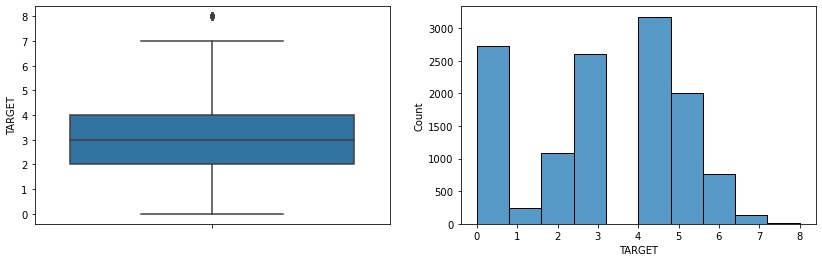

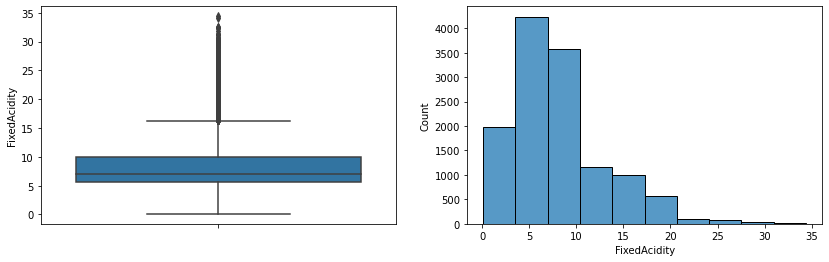

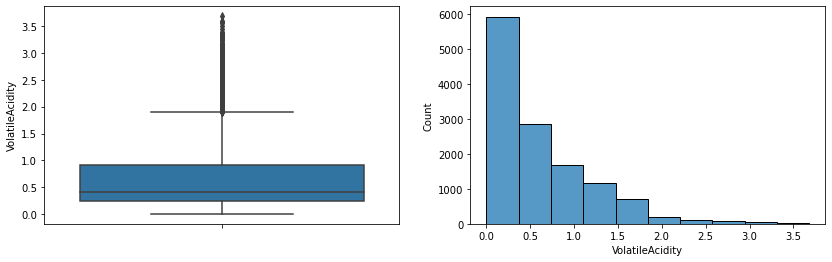

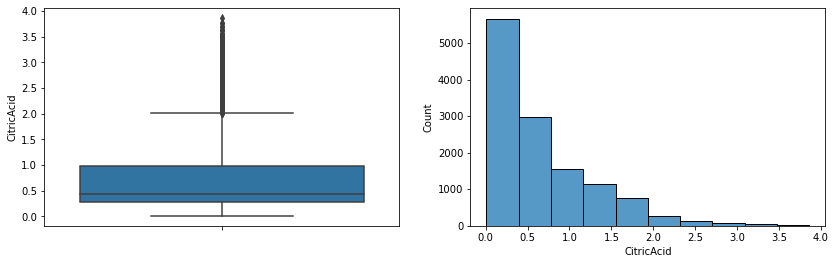

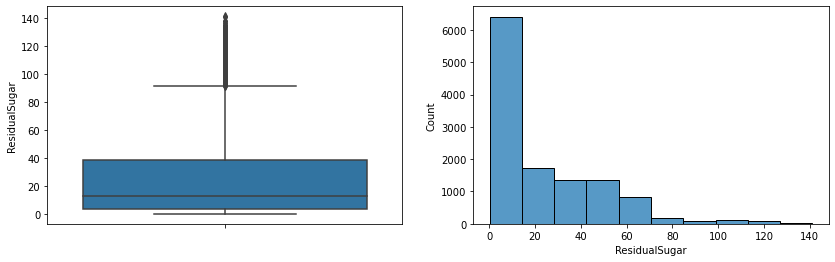

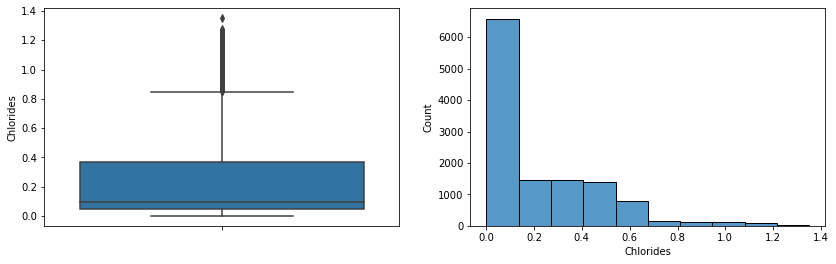

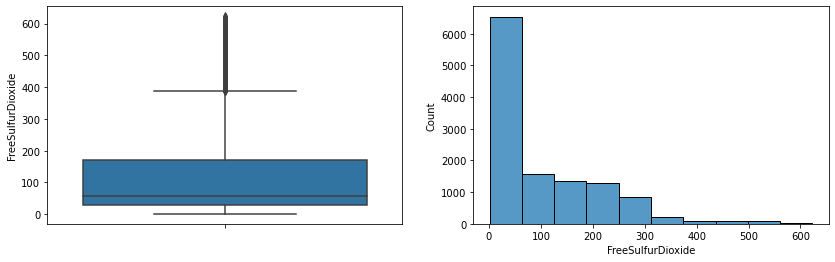

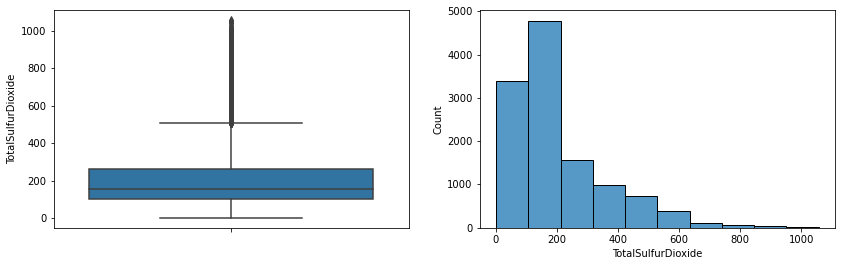

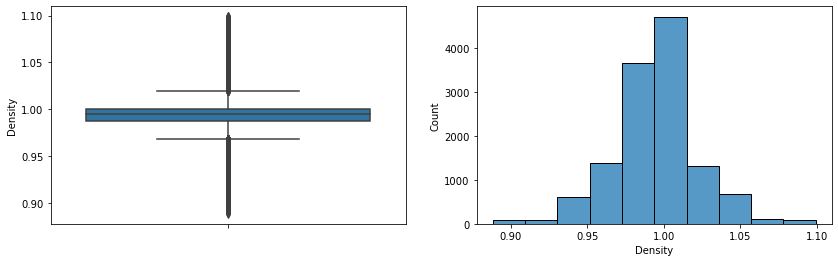

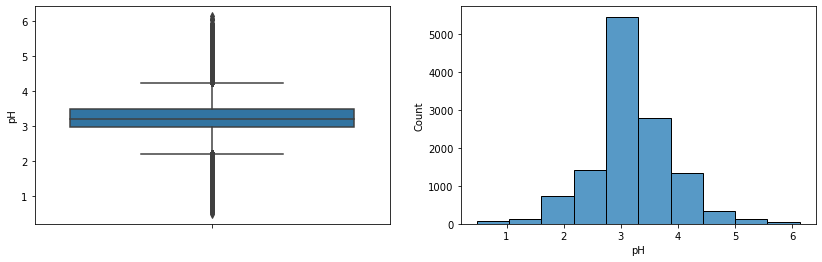

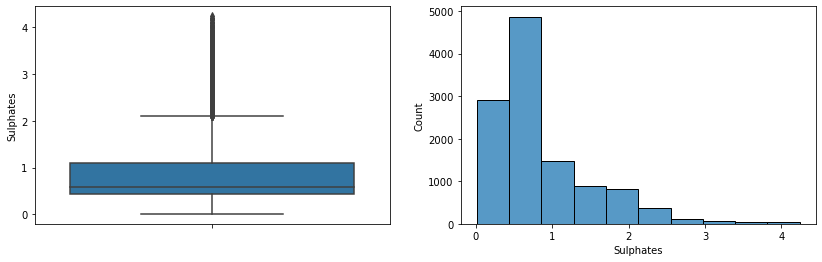

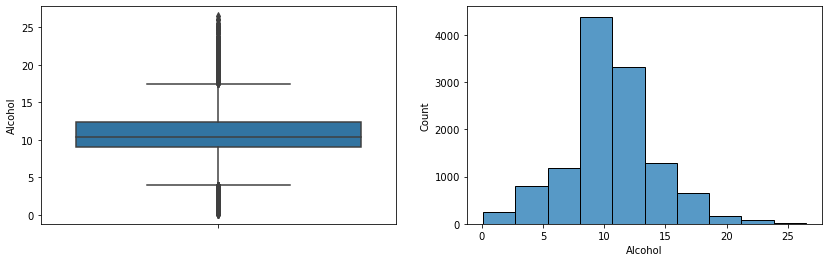

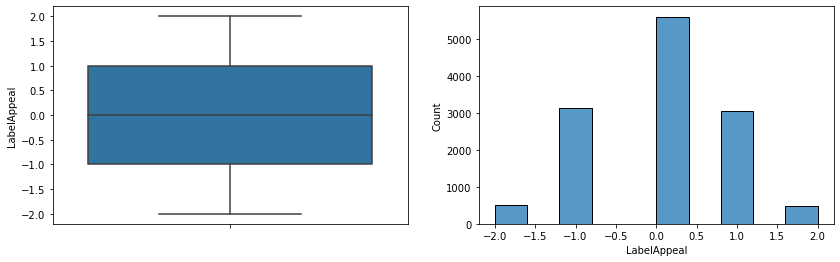

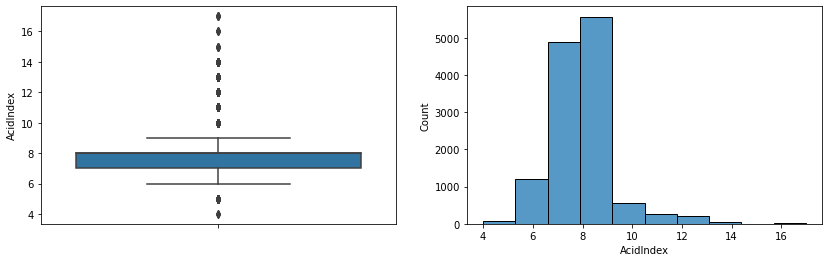

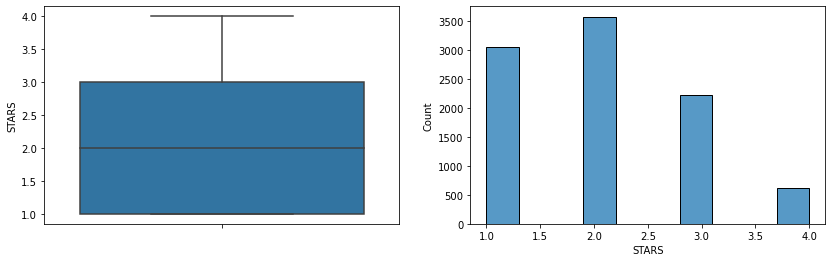

In [11]:
# Use the charts to analyze the distribution for each variable
for col in data.columns:
    fig, axes = plt.subplots(1, 2,figsize=(14,4))
    sns.histplot(data=data, ax=axes[1], x = col, bins=10)
    sns.boxplot(ax=axes[0], y = col, data = data,orient='v')

+ Based on the histograms, although Density, pH and LabrlAppeal follow the nearly normal distribution, the rest variables, showing right-skewed distribution, do not show symmetric and unimodal distribution.
+ Box plots suggest many variables (chemical properties of wine) have outliers that could influence the usability of the dataset. Therefore, in further study, we will use Box-Cox to transform the data distribution. 

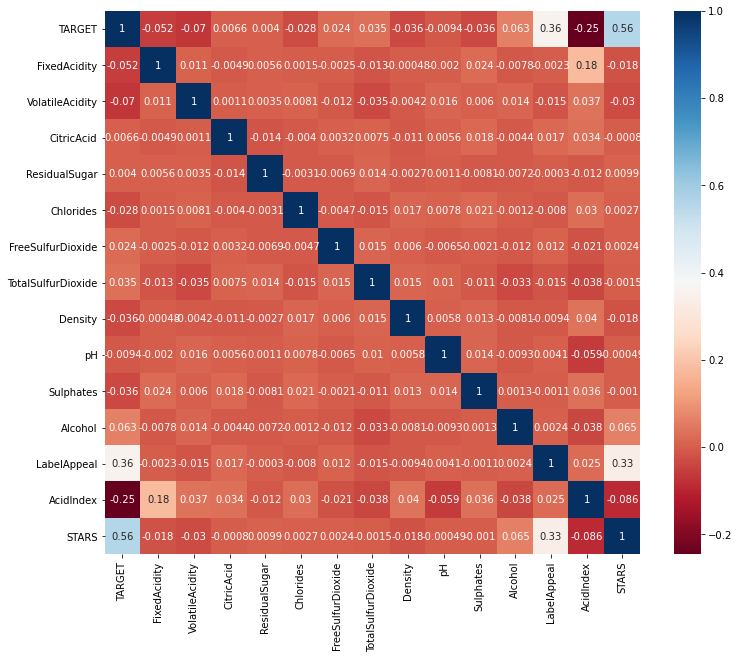

In [12]:
# Use the heatmap to visualize the correlation between each feature

# Finding the correlation bewteen the Features.
plt.figure(figsize=(12,10))

corr = data.corr()
# Plot the heatmap
sns.heatmap(corr, cmap="RdBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

# Show the heatmap
plt.show()


+ The heatmap shows that the response variable(Target) has no substantial relationship with other variables.
+ "TARGET" and "LabelAppeal" have a weak positive relation, that is 0.36. The relationship suggests a   "LabelAppeal" rating increase, and wine sales will be up.
+ "TARGET" and "STARS" have a medium positive relation, that is 0.56. The relationship suggests a      "LabelAppeal" rating increase, and wine sales will be up.
+ "LabelAppeal" and "STARS" have a weak positive relation(0.33) because they are subjective marketing values.
+ "TARGET" and "AcidIndex" have a weak negative relation, that is -0.25. The relationship suggests an "Acidindex" rating increase, and wine sales will be down.

# Data Cleaning

### Step 1: Missing Values

According to the EDA results above, we can locate the missing values. A total of 8 variables have missing values.

1.Numerical Data: ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, pH, Sulphates,Alcohol
For the missing data of numerical data, we use the KNN imputer method of filling.

2.Categorical Data: STARS

Regarding "stars" variable, It is an indicator for red wine experts to score the quality of red wine,with a certain degree of subjectivity.We decided to try two ways to fill the data based on below two scenarios：
+ "0" replace NaN: Suppose the experts have no time to taste this type of wine or have not evaluated it in time, or the experts do not even want to give 1 point to this type of wine because of the bad experience. In that case, we consider replacing these vacant values with 0. 
+ KNNImputer: Experts indeed scored all wines, but the information was missing due to machine malfunctions or other human factors. We will use the KNN method to fill in missing data.


In [13]:
# Copy the dataframe for the further steps
data = data.copy()
# Data.head(5)

##### 1. KNN Imputer and using "0" to replace "stars" missing data


In [14]:
# Load the packages for the models
from sklearn.impute import KNNImputer

In [15]:
# Choose the columns for the model
data_1=data[['TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex']]
data_1

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex
0,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8
1,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7
2,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8
3,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6
4,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,0,5.0,0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5
12791,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,1.20,NaN,-1,8
12792,4,6.0,0.170,1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6
12793,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6


To choose the best K value in KNN, we use Scikit-Learn to divide the data set into training and test subsets, train the model and verify it. We chose the RandomForestRegressor"  for training and used RMSE  to verify. Also, which K has the lowest RMSE value, will be selected as our n_neighbors. 

In [16]:
''' # upload package sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Assign np.sqrt to variable rmse.
rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))'''

In [17]:
''' # define optimize_k function.
def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data_1.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors '''

In [18]:
# Insert data_1 and assign response variable "TARGET" to target.

# k_errors = optimize_k(data=data_1, target='TARGET')

In [19]:
# The output of k_errors
# k_errors 

[{'K': 1, 'RMSE': 1.7133962101277191},
 {'K': 3, 'RMSE': 1.7081298490121768},
 {'K': 5, 'RMSE': 1.704889229274251},
 {'K': 7, 'RMSE': 1.7053439785537483},
 {'K': 9, 'RMSE': 1.7099283559304483},
 {'K': 11, 'RMSE': 1.7064235581783949},
 {'K': 13, 'RMSE': 1.7000374682674175},
 {'K': 15, 'RMSE': 1.7054838452889602},
 {'K': 17, 'RMSE': 1.7026815046771593},
 {'K': 19, 'RMSE': 1.7089731119311486}]

According to the result, when K is 13, the RMSE has the lowest value. Therefore, we chose K = 13 in further study. 

In [53]:
# Use knn function to deal with the missing values
imputer = KNNImputer(n_neighbors=13)
data_1 = pd.DataFrame(imputer.fit_transform(data_1),columns = data_1.columns)

In [54]:
# Check if null values still exist
data_1.isna().sum()

TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64

In [55]:
# Pre-review the dataframe
data_1.tail()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
12790,0.0,5.0,0.79,2.01,5.000000,0.043000,17.0,101.000000,1.01077,3.39,0.570000,4.900000,1.0,5.0,0.0
12791,5.0,8.9,0.47,0.29,84.900000,0.259000,54.0,215.078947,0.99518,4.46,1.200000,9.160526,-1.0,8.0,2.0
12792,4.0,6.0,0.17,1.10,37.000000,0.078000,25.0,108.000000,0.99076,3.25,0.793158,12.300000,0.0,6.0,2.0
12793,3.0,7.7,0.32,0.12,28.515789,0.029000,26.0,274.000000,0.99060,3.97,0.620000,11.000000,-1.0,6.0,2.0
12794,4.0,5.2,0.04,0.81,52.700000,0.242263,106.0,242.000000,0.99454,3.94,0.120000,9.900000,0.0,7.0,2.0


In [56]:
# Pre-review the dataframe
data_1.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.0,3.2,1.160,0.98,54.2,0.567000,125.789474,268.0,0.99280,3.33,0.59,9.900000,0.0,8.0,2.0
1,3.0,4.5,0.160,0.81,26.1,0.425000,15.000000,327.0,1.02792,3.38,0.70,10.465789,-1.0,7.0,3.0
2,5.0,7.1,2.640,0.88,14.8,0.037000,214.000000,142.0,0.99518,3.12,0.48,22.000000,-1.0,8.0,3.0
3,3.0,5.7,0.385,0.04,18.8,0.425000,22.000000,115.0,0.99640,2.24,1.83,6.200000,-1.0,6.0,1.0
4,4.0,8.0,0.330,1.26,9.4,0.160684,167.000000,108.0,0.99457,3.12,1.77,13.700000,0.0,9.0,2.0


In [57]:
# Use the fillna fucntion to update the column STARS
# Use the 0 to replace the missing values in this column
data_stars=data['STARS'].fillna(0)
data_stars

0        2.0
1        3.0
2        3.0
3        1.0
4        2.0
        ... 
12790    0.0
12791    2.0
12792    2.0
12793    2.0
12794    2.0
Name: STARS, Length: 12795, dtype: float64

In [58]:
# Update the dataframe for further analysis
data_1=pd.concat([data_1,data_stars],axis=1)
# data_1.head(30)

##### 2.KNNImputer

In [61]:
# Use knn function to deal with the missing values
imputer = KNNImputer(n_neighbors=13)
data_2 = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)
data_2.tail(30)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
12765,4.0,5.7,1.180,0.29,45.100000,1.107000,26.000000,81.000000,0.99572,3.960000,0.370000,17.100000,0.0,6.0,2.000000
12766,0.0,10.4,0.240,0.46,1.800000,0.640000,30.000000,329.000000,1.03355,2.300000,1.020000,0.300000,-1.0,11.0,1.923077
12767,5.0,7.6,1.060,0.29,8.600000,0.053000,164.000000,41.000000,0.96954,3.379231,0.700000,9.800000,1.0,8.0,2.000000
12768,6.0,18.9,0.965,0.60,65.800000,0.564000,173.000000,160.000000,0.99302,3.200000,0.741538,11.500000,2.0,9.0,3.000000
12769,0.0,13.7,0.465,0.72,3.300000,0.085000,17.000000,43.000000,0.89956,3.060000,0.800000,10.000000,-1.0,15.0,1.461538
12770,4.0,12.3,0.680,0.28,1.400000,0.037000,36.000000,83.000000,0.99074,3.330000,0.850000,10.300000,-1.0,6.0,3.000000
12771,6.0,7.8,0.200,0.65,10.200000,0.478000,204.000000,157.000000,1.02909,3.140000,1.440000,10.000000,2.0,8.0,2.153846
12772,0.0,0.7,2.020,1.06,1.400000,0.112000,6.000000,153.769231,0.97690,2.720000,0.610000,17.000000,1.0,13.0,1.692308
12773,0.0,7.4,0.935,0.34,2.300000,0.045000,73.500000,214.000000,0.99340,3.180000,0.610000,9.900000,0.0,8.0,1.769231
12774,5.0,6.9,1.810,1.27,1.700000,0.036000,61.000000,101.000000,1.01950,3.520000,0.540000,17.500000,0.0,7.0,3.000000


In [62]:
# The decimal point is rounded off for " Stars" and only the whole number is retained.
data_2 = data_2.round({"STARS":0})
# data_2.head(30)

Because the following processes of cleaning data are very similar, we will choose the first method, which replaces "STARS" missing values with "0".

### Step 2: Invalid Data Values

According to the results of EDA (For detailed analysis, please go back to cell In[5]), we will select the valid data for "TotalSulfurDioxide" and " pH" variables.

In [63]:
# Select the valid data that has "pH"between 3 and 4 and the Total Sulfur Dioxide is no larger than 350.
data_1_valid= np.where((data_1['pH'] > 3) & (data_1['pH'] < 4) & (data_1['TotalSulfurDioxide'] <= 350 ))
data_new = data_1.loc[data_1_valid]
data_new

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,STARS
0,3.0,3.2,1.16,0.98,54.200000,0.567000,125.789474,268.0,0.99280,3.33,0.590000,9.900000,0.0,8.0,2.0,2.0
1,3.0,4.5,0.16,0.81,26.100000,0.425000,15.000000,327.0,1.02792,3.38,0.700000,10.465789,-1.0,7.0,3.0,3.0
2,5.0,7.1,2.64,0.88,14.800000,0.037000,214.000000,142.0,0.99518,3.12,0.480000,22.000000,-1.0,8.0,3.0,3.0
4,4.0,8.0,0.33,1.26,9.400000,0.160684,167.000000,108.0,0.99457,3.12,1.770000,13.700000,0.0,9.0,2.0,2.0
5,0.0,11.3,0.32,0.59,2.200000,0.556000,37.000000,15.0,0.99940,3.20,1.290000,15.400000,0.0,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12787,2.0,6.5,0.15,0.78,1.400000,0.875000,531.000000,105.0,0.99260,3.14,0.716316,10.100000,0.0,7.0,1.0,1.0
12790,0.0,5.0,0.79,2.01,5.000000,0.043000,17.000000,101.0,1.01077,3.39,0.570000,4.900000,1.0,5.0,0.0,0.0
12792,4.0,6.0,0.17,1.10,37.000000,0.078000,25.000000,108.0,0.99076,3.25,0.793158,12.300000,0.0,6.0,2.0,2.0
12793,3.0,7.7,0.32,0.12,28.515789,0.029000,26.000000,274.0,0.99060,3.97,0.620000,11.000000,-1.0,6.0,2.0,2.0


Based on the research and result, there are 6548 valid observations. We will use these observations to do the next step.

### Step 3:  Transformation 

- 'FixedAcidity', 'VolatileAcidity', 'CitricAcid','ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide','Sulphates', 'Alcohol','AcidIndex' are not following normal distribution. And, we already handle with "0" values replaced by NaN, so we use boxcox to deal with data transformation.

In [64]:
# Import library
from scipy.stats import boxcox 
from scipy import stats
from sklearn.preprocessing import power_transform

In [65]:
# Define function called normal_distro
def normal_distro(df, col):
    x = df[col]
    y, _ = stats.boxcox(x)
    df[col] = pd.DataFrame(y)
    return df

In [66]:
# Only the below variables are skewed to the right side
cols_to_check = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid','ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide','Sulphates', 'Alcohol','AcidIndex']
for col in cols_to_check:
    data_new = normal_distro(data_new, col)

# Prepped Data Review 
After fixing the missing data values, invalid data values, and transformed data distribution, we will re-run the EDA on the adjusted variables during the data preparation work.

<AxesSubplot:xlabel='FixedAcidity', ylabel='Count'>

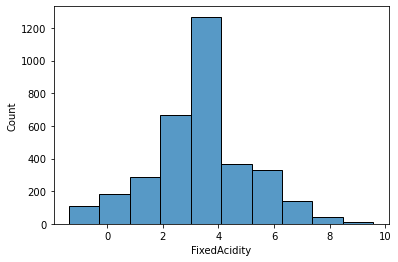

In [67]:
# FixedAcidity
sns.histplot(data=data_new,x = data_new["FixedAcidity"], bins=10)

Text(0.5, 1.0, 'Fixed Acidity')

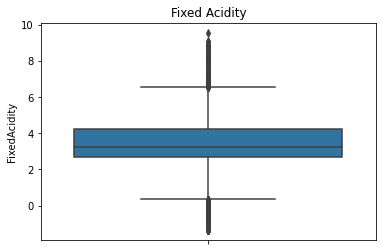

In [68]:
# FixedAcidity
sns.boxplot( data=data_new, y = data_new["FixedAcidity"],orient='v')
plt.title("Fixed Acidity")

Based on the Prepped EDA Review, FixedAcidity has many outliers and shows a right-skewed distribution. Compared with the first part of EDA, this attribute is closer to the normal distribution, but there are still some outliers.

<AxesSubplot:xlabel='VolatileAcidity', ylabel='Count'>

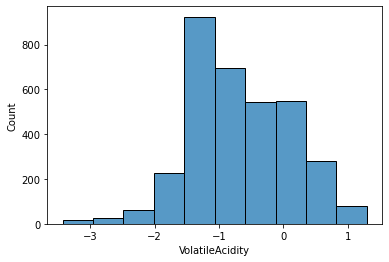

In [69]:
# VolatileAcidity
sns.histplot(data=data_new,x = data_new["VolatileAcidity"], bins=10)  

Text(0.5, 1.0, 'Volatile Acidity')

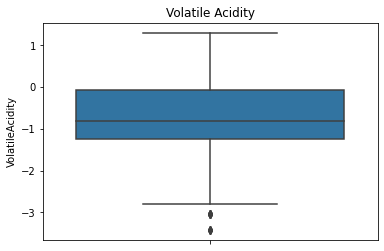

In [70]:
# VolatileAcidity
sns.boxplot( data=data_new, y = data_new["VolatileAcidity"],orient='v')
plt.title("Volatile Acidity")

Based on Prepped EDA Review, Volatile Acidity has many outliers, and it shows the right-skewed distribution. After the data preparation, the attribute follows left-skewed distribution, with much fewer outliers. Suppose this attribute is needed in model prediction, it can be used as an explainable variable.   

<AxesSubplot:xlabel='CitricAcid', ylabel='Count'>

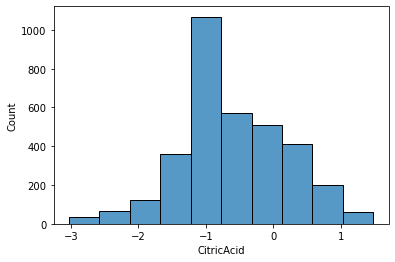

In [71]:
# CitricAcid
sns.histplot(data=data_new,x = data_new["CitricAcid"], bins=10)  

Text(0.5, 1.0, 'Citric Acid')

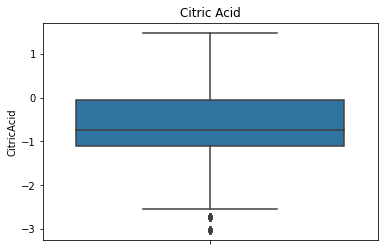

In [72]:
# CitricAcid
sns.boxplot( data=data_new, y = data_new["CitricAcid"],orient='v')
plt.title("Citric Acid")

Based on Prepped EDA Review, Citric Acid shows outliers, and it follows a right-skewed distribution. After the data preparation, the attribute follows a left-skewed distribution, with much fewer outliers. Regarding the actual scenario, we will decide whether to use this attribute. 

<AxesSubplot:xlabel='ResidualSugar', ylabel='Count'>

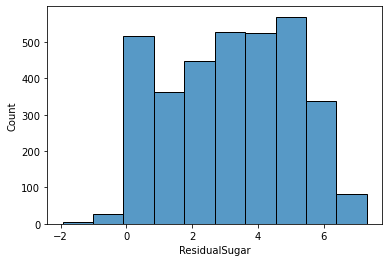

In [73]:
# ResidualSugar
sns.histplot(data=data_new,x = data_new["ResidualSugar"], bins=10)  


Text(0.5, 1.0, 'Residual Sugar')

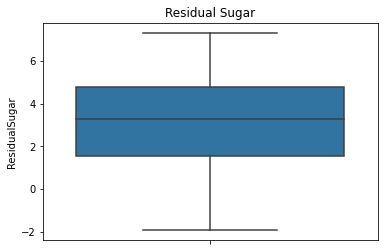

In [74]:
# ResidualSugar
sns.boxplot( data=data_new, y = data_new["ResidualSugar"],orient='v')
plt.title("Residual Sugar")

According to the Prepped EDA Review, Residual Sugar does not follow the nearly normal distribution, but it has fewer outliers compare to earlier EDA. Suppose this attribute is needed in model prediction, it can be used as an explainable variable.

<AxesSubplot:xlabel='Chlorides', ylabel='Count'>

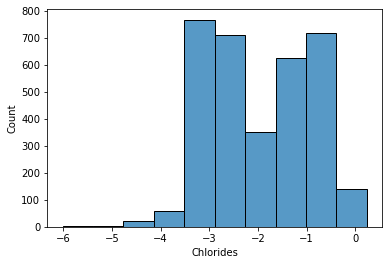

In [75]:
# Chlorides
sns.histplot(data=data_new,x = data_new["Chlorides"], bins=10)  

Text(0.5, 1.0, 'Chlorides')

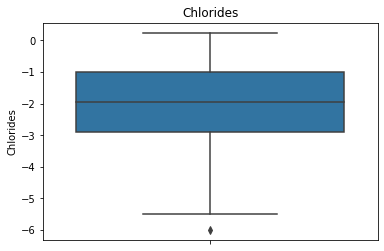

In [76]:
# Chlorides
sns.boxplot( data=data_new, y = data_new["Chlorides"],orient='v')
plt.title("Chlorides")

In the initial EDA, Chlorides have many outliers, and it shows the right-skewed distribution. After the data preparation, the attribute follows bimodal distribution, and it has much fewer outliers. In this case, using Chlorides as an explanatory variable depends on how it plays an essential role in model prediction. 

<AxesSubplot:xlabel='FreeSulfurDioxide', ylabel='Count'>

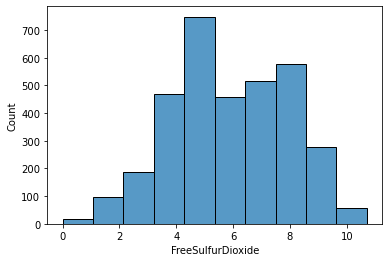

In [77]:
# FreeSulfurDioxide
sns.histplot(data=data_new,x = data_new["FreeSulfurDioxide"], bins=10)  

Text(0.5, 1.0, 'Free Sulfur Dioxide')

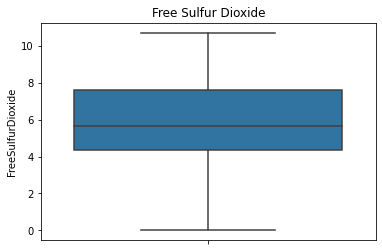

In [78]:
# FreeSulfurDioxide
sns.boxplot( data=data_new, y = data_new["FreeSulfurDioxide"],orient='v')
plt.title("Free Sulfur Dioxide")

In the initial EDA, FreeSulfurDioxide has many outliers, and it shows the right-skewed distribution. After the data preparation, the attribute follows a nearly normal distribution, and it has no outliers. It could be used in model prediction in further study. 

<AxesSubplot:xlabel='TotalSulfurDioxide', ylabel='Count'>

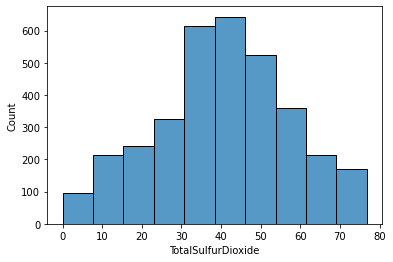

In [79]:
# TotalSulfurDioxide
sns.histplot(data=data_new,x = data_new["TotalSulfurDioxide"], bins=10)  

Text(0.5, 1.0, 'Total Sulfur Dioxide')

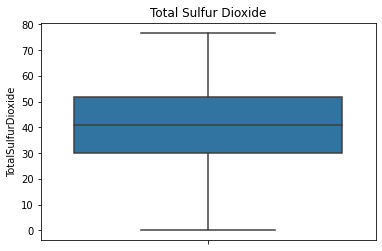

In [80]:
# TotalSulfurDioxide
sns.boxplot( data=data_new, y = data_new["TotalSulfurDioxide"],orient='v')
plt.title("Total Sulfur Dioxide")

Based on the initial EDA, TotalSulfurDioxide has many outliers, and it shows the right-skewed distribution. After the data preparation, the attribute follows a nearly normal distribution, and it has no outliers. It could be used in model prediction in further study. ​

<AxesSubplot:xlabel='Sulphates', ylabel='Count'>

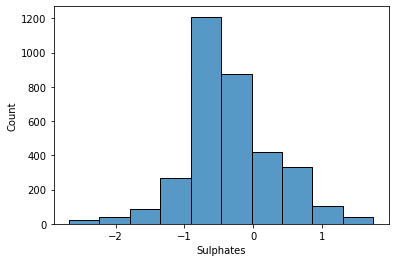

In [81]:
# Sulphates
sns.histplot(data=data_new,x = data_new["Sulphates"], bins=10)  

Text(0.5, 1.0, 'Sulphates')

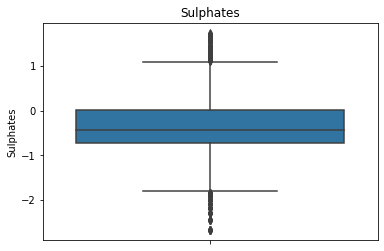

In [82]:
# Sulphates
sns.boxplot( data=data_new, y = data_new["Sulphates"],orient='v')
plt.title("Sulphates")

Based on the Prepped EDA Review, Sulphates has many outliers and shows a nearly normal distribution. Compared with the first EDA, this attribute is closer to the normal distribution, but there are still some outliers. 

<AxesSubplot:xlabel='Alcohol', ylabel='Count'>

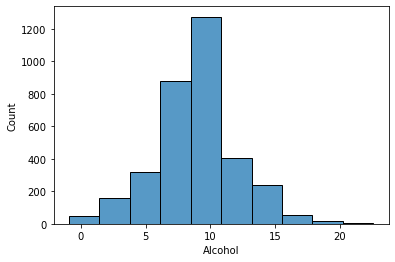

In [83]:
# Alcohol
sns.histplot(data=data_new,x = data_new["Alcohol"], bins=10)  

Text(0.5, 1.0, 'Alcohol')

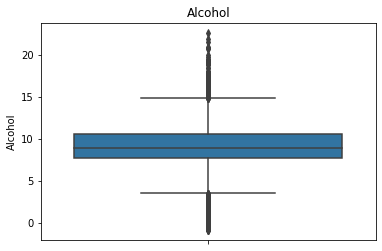

In [84]:
# Alcohol
sns.boxplot( data=data_new, y = data_new["Alcohol"],orient='v')
plt.title("Alcohol")

Based on Prepped EDA Review, Alcohol has many outliers, and it shows a right-skewed distribution. After the data preparation, the attribute does not change the distribution very much, and it still has many outliers. We will be based on the actual situation to decide whether it will be used in the model prediction. 

<AxesSubplot:xlabel='AcidIndex', ylabel='Count'>

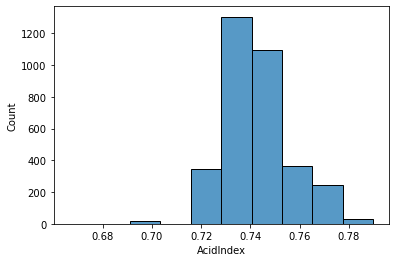

In [85]:
# AcidIndex
sns.histplot(data=data_new,x = data_new["AcidIndex"], bins=10)  

Text(0.5, 1.0, 'AcidIndex')

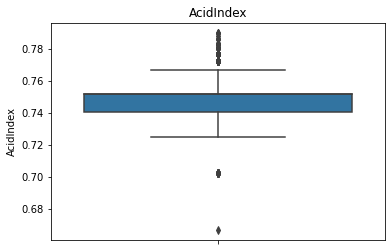

In [86]:
# AcidIndex
sns.boxplot( data=data_new, y = data_new["AcidIndex"],orient='v')
plt.title("AcidIndex")

In the initial EDA, the histogram and box plot show a right-skewed distribution and it has many outliers. After the data preparation, Acid Index follows a nearly normal distribution, but it still has many outliers. We will be based on the actual situation to decide whether it will be used in the model prediction. 


# Conclusions

To improve this dataset's useability, we cleaned the data by handling invalid and missing data through domain knowledge. Clearly, We understand the relationship between the response and explainable variables through the heatmap. Also, we used box-cox to do data transformation. The original data has a total of 12795 observations. After cleaning, 6548 observations are left for subsequent model predictions. 
The data distribution of wine-related chemical variables is shifted from skewed to right to a nearly normal distribution with fewer outliers. 






# Reference

- KNNImputer: https://scikit-learn.org/stable/modules/impute.html
- BOXCOX: https://www.statology.org/box-cox-transformation-python/
- K value of KNN: https://www.cxyzjd.com/article/m0_46510245/109270839

Wine domain knowledge:
- https://www.winemag.com/2019/06/19/what-is-acidity-in-wine/
- https://www.extension.iastate.edu/wine/sulfur-dioxide-measurement-and-overestimation-red-wine
- https://winefolly.com/tips/the-lightest-to-the-strongest-wine/
- https://winemakermag.com/article/wine-acid-101
- https://www.awri.com.au/wp-content/uploads/2018/08/s1530.pdf#:~:text=The%20higher%20extraction%20of%20chloride,juice%20x%201.7%20%3D%20606).
- https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity#:~:text=Their%20respective%20levels%20found%20in,2%2C000%20mg%2FL%20succinic%20acid.
- http://www.creativeconnoisseur.com/newsletter/files/497deafe6be1b2efc87df8ac6071e459-162.html#:~:text=The%20typical%20density%20or%20specific,generally%20between%201.080%20and%201.090.
- https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity#:~:text=The%20predominant%20fixed%20acids%20found,2%2C000%20mg%2FL%20succinic%20acid.
- https://winefolly.com/deep-dive/sugar-in-wine-chart/#:~:text=Wines%20range%20from%200%20to,grams%20of%20sugar%20per%20bottle.
- https://extension.psu.edu/volatile-acidity-in-wine#:~:text=In%20general%2C%20per%20the%20CFR,red%20and%20white%20wines%2C%20respectively.
-  https://winefolly.com/deep-dive/sulfites-in-wine/#:~:text=How%20Much%20Sulfur%20is%20in,about%2050%20mg%2Fl%20sulfites.